# **Importing the library**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#Support Vector Machine
import itertools
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
from tqdm.notebook import tqdm_notebook as tqdm
from sklearn.svm import SVC
#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense #makes summation, activation
from keras.optimizers import SGD, Adam
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [ ]:
df = pd.read_csv('/content/mhealth_raw_data.csv')
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


# **Preprocessing**

In [ ]:
df.shape

(1215745, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [ ]:
#before droping the nulls
df.describe()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
count,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06
mean,1.494200e+00,-9.692878e+00,-9.548056e-01,-1.598951e-03,-6.166318e-01,-1.587811e-01,-3.713413e+00,-5.805526e+00,2.393880e+00,-2.761061e-01,-4.664340e-01,2.666335e-01,1.741465e+00
std,3.826485e+00,4.171303e+00,5.461803e+00,4.912172e-01,3.546406e-01,5.467979e-01,4.763586e+00,5.757639e+00,3.876503e+00,5.276888e-01,5.555510e-01,5.643804e-01,3.283679e+00
min,-2.214600e+01,-1.961900e+01,-1.937300e+01,-2.146600e+00,-7.789900e+00,-2.626700e+00,-2.236100e+01,-1.897200e+01,-1.823900e+01,-8.339200e+00,-3.570800e+00,-2.689700e+00,0.000000e+00
25%,1.413100e-01,-1.020100e+01,-2.649400e+00,-4.359900e-01,-8.180100e-01,-5.933200e-01,-6.076000e+00,-9.404200e+00,1.296500e-01,-7.058800e-01,-8.973300e-01,-2.370700e-01,0.000000e+00
50%,1.308900e+00,-9.670300e+00,-1.645600e-02,-1.484200e-02,-7.073200e-01,-1.905700e-01,-2.977600e+00,-7.461500e+00,1.928100e+00,-3.549000e-01,-6.345000e-01,3.017200e-01,0.000000e+00
75%,2.575800e+00,-9.042200e+00,1.301300e+00,4.489800e-01,-5.403400e-01,3.222000e-01,-1.193700e+00,-2.533900e+00,4.914700e+00,9.607800e-02,-1.067800e-01,7.780200e-01,2.000000e+00
max,2.005400e+01,2.116100e+01,2.501500e+01,6.048400e+01,2.011300e+00,2.770100e+00,1.986400e+01,2.219100e+01,2.574100e+01,3.319600e+00,1.556500e+00,2.750000e+00,1.200000e+01


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [ ]:
# Loop over the DataFrame columns
for col in df.columns:
    # Calculate mode of the column
    mode_col = df[col].mode()[0]

    # If column is numeric
    if pd.api.types.is_numeric_dtype(df[col]):
        # Replace null or NaN values with mode
        df[col].fillna(mode_col, inplace=True)
    else:
        # For string columns, fill NaN values with the mode
        df[col].fillna(mode_col, inplace=True)

In [ ]:
df.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [ ]:
# after filling the null value
df.describe()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
count,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06
mean,1.494200e+00,-9.692878e+00,-9.548056e-01,-1.598951e-03,-6.166318e-01,-1.587811e-01,-3.713413e+00,-5.805526e+00,2.393880e+00,-2.761061e-01,-4.664340e-01,2.666335e-01,1.741465e+00
std,3.826485e+00,4.171303e+00,5.461803e+00,4.912172e-01,3.546406e-01,5.467979e-01,4.763586e+00,5.757639e+00,3.876503e+00,5.276888e-01,5.555510e-01,5.643804e-01,3.283679e+00
min,-2.214600e+01,-1.961900e+01,-1.937300e+01,-2.146600e+00,-7.789900e+00,-2.626700e+00,-2.236100e+01,-1.897200e+01,-1.823900e+01,-8.339200e+00,-3.570800e+00,-2.689700e+00,0.000000e+00
25%,1.413100e-01,-1.020100e+01,-2.649400e+00,-4.359900e-01,-8.180100e-01,-5.933200e-01,-6.076000e+00,-9.404200e+00,1.296500e-01,-7.058800e-01,-8.973300e-01,-2.370700e-01,0.000000e+00
50%,1.308900e+00,-9.670300e+00,-1.645600e-02,-1.484200e-02,-7.073200e-01,-1.905700e-01,-2.977600e+00,-7.461500e+00,1.928100e+00,-3.549000e-01,-6.345000e-01,3.017200e-01,0.000000e+00
75%,2.575800e+00,-9.042200e+00,1.301300e+00,4.489800e-01,-5.403400e-01,3.222000e-01,-1.193700e+00,-2.533900e+00,4.914700e+00,9.607800e-02,-1.067800e-01,7.780200e-01,2.000000e+00
max,2.005400e+01,2.116100e+01,2.501500e+01,6.048400e+01,2.011300e+00,2.770100e+00,1.986400e+01,2.219100e+01,2.574100e+01,3.319600e+00,1.556500e+00,2.750000e+00,1.200000e+01


# **Data Splitting**

In [ ]:
df['Activity'].value_counts()

Activity
0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
10     30720
11     30720
5      30720
7      29441
8      29337
6      28315
12     10342
Name: count, dtype: int64

In [ ]:
# Calculate the minimum class count
min_class = df['Activity'].value_counts().min()

# Define a function to sample each group based on the minimum class count
def sample_group(group):
    return group.sample(min_class, random_state=42)

# Apply the sampling function to each group and concatenate the results
df_samples = df.groupby('Activity', group_keys=False).apply(sample_group)
df_samples

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
1212350,1.33590,-9.7394,-1.66110,0.58813,-0.58724,-0.662080,-3.2703,-9.05310,-0.30682,0.401960,-1.061600,0.14655,0,subject10
134482,2.52730,-12.7320,-3.88220,0.51763,-0.58537,-0.758350,-4.3463,-10.51300,1.71390,-0.272550,-0.765910,0.85129,0,subject1
820343,0.55205,-9.7466,1.58070,0.55288,-0.76173,-0.176820,-5.8155,-8.16430,-2.42900,0.137250,-0.997950,0.52155,0,subject7
718210,2.49960,-9.3680,1.81700,0.73655,-0.55159,0.068762,-3.0504,-5.91350,4.65220,0.084314,-0.710470,0.90086,0,subject6
118798,-3.48370,-9.2520,0.54423,-0.37662,-0.61163,0.609040,-6.5952,-0.79894,7.10590,-0.900000,1.145800,0.81897,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717006,4.21450,-3.1419,-9.24000,0.39147,-0.89493,0.013752,-20.8850,-18.81200,-8.24270,-0.856860,-0.375770,0.56897,12,subject6
716463,5.36410,-6.1145,-8.48130,0.53432,-0.81051,-0.007858,-21.1400,-18.69800,-0.77864,-0.694120,-0.710470,0.47629,12,subject6
716662,0.70801,-19.3040,-4.62480,0.48237,-0.82739,0.080550,-2.4445,-1.29750,-1.75240,-0.956860,-0.207390,0.48491,12,subject6
114268,0.20464,-2.3600,-3.32430,0.72913,-0.56098,-0.392930,3.7371,0.66210,-2.78980,-0.547060,0.289530,0.93966,12,subject1


In [ ]:
#  after taking the sample I will shuffle the data to make sure the sample is representative
df = df_samples.sample(frac=1, random_state= None)
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
710020,6.75940,0.59502,3.06610,-0.16512,0.48780,-1.00200,-20.584000,-18.8920,-18.226000,0.182350,-1.06370,-0.29957,11,subject6
535376,2.09150,-9.67820,0.49534,0.74954,-0.64728,-0.11984,-2.315900,-9.6260,0.404120,0.435290,-0.99179,0.42888,1,subject5
1152245,0.63341,-9.82720,0.45248,0.58256,-0.81801,-0.53635,-6.855900,-2.8286,6.139800,-0.033333,-0.78645,0.54310,0,subject10
676778,1.85210,-9.35240,2.38420,-0.20779,-0.92308,-0.46365,-3.621800,-12.0190,0.065700,-0.254900,-0.91376,-0.51293,6,subject6
77984,0.23565,-6.70970,-6.61440,0.39703,-0.69043,-0.18075,-0.037368,-4.9843,8.573700,0.643140,-0.54209,1.05170,9,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509444,1.36410,-13.00200,-3.12600,0.20037,-0.71857,0.25933,0.993090,-10.4860,7.392400,0.866670,-0.21150,0.74569,9,subject4
557510,1.27520,-9.40790,1.78190,-0.64378,-0.72608,0.24361,-0.544940,-5.7392,0.077622,-0.780390,-0.63244,0.41164,6,subject5
716527,-0.37318,-0.82505,1.65290,0.46197,-0.80675,0.21611,3.919100,1.3292,-1.079400,-0.725490,-0.25667,0.81250,12,subject6
465694,4.03560,1.27730,8.91670,0.47495,0.45966,0.29666,-4.556800,-1.5559,8.411800,-0.098039,0.37782,0.79310,3,subject4


In [ ]:
df['Activity'].value_counts()

Activity
11    10342
1     10342
0     10342
6     10342
9     10342
5     10342
7     10342
3     10342
12    10342
8     10342
10    10342
2     10342
4     10342
Name: count, dtype: int64

In [ ]:
#  I dropped the subject column (volunteers number)
df.drop(['subject'], axis=1, inplace = True)
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
710020,6.75940,0.59502,3.06610,-0.16512,0.48780,-1.00200,-20.584000,-18.8920,-18.226000,0.182350,-1.06370,-0.29957,11
535376,2.09150,-9.67820,0.49534,0.74954,-0.64728,-0.11984,-2.315900,-9.6260,0.404120,0.435290,-0.99179,0.42888,1
1152245,0.63341,-9.82720,0.45248,0.58256,-0.81801,-0.53635,-6.855900,-2.8286,6.139800,-0.033333,-0.78645,0.54310,0
676778,1.85210,-9.35240,2.38420,-0.20779,-0.92308,-0.46365,-3.621800,-12.0190,0.065700,-0.254900,-0.91376,-0.51293,6
77984,0.23565,-6.70970,-6.61440,0.39703,-0.69043,-0.18075,-0.037368,-4.9843,8.573700,0.643140,-0.54209,1.05170,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509444,1.36410,-13.00200,-3.12600,0.20037,-0.71857,0.25933,0.993090,-10.4860,7.392400,0.866670,-0.21150,0.74569,9
557510,1.27520,-9.40790,1.78190,-0.64378,-0.72608,0.24361,-0.544940,-5.7392,0.077622,-0.780390,-0.63244,0.41164,6
716527,-0.37318,-0.82505,1.65290,0.46197,-0.80675,0.21611,3.919100,1.3292,-1.079400,-0.725490,-0.25667,0.81250,12
465694,4.03560,1.27730,8.91670,0.47495,0.45966,0.29666,-4.556800,-1.5559,8.411800,-0.098039,0.37782,0.79310,3


In [ ]:
# # Take a random sample of size 100000
# sample_size = 100000
# df = df.sample(n=sample_size, random_state=42)  # Use a specific random state for reproducibility

X = df[['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx', 'gry', 'grz']]
y = df['Activity']

# Scaling:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=None, shuffle=True)

In [ ]:
#check the traing set and test set shapes:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(107556, 12) (26890, 12) (107556,) (26890,)


# **Validation the data**

In [ ]:
df.corr()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
alx,1.000000,0.047277,-0.087337,0.082132,0.122229,-0.031408,-0.049518,0.108235,-0.020710,-0.062458,0.103180,0.008617,0.022993
aly,0.047277,1.000000,0.121419,0.071397,0.410161,0.120371,0.109766,0.159477,0.091116,0.079679,0.249965,0.093772,-0.138429
alz,-0.087337,0.121419,1.000000,-0.002437,0.276721,0.143044,-0.110626,0.324246,0.175230,0.042557,0.108433,0.011152,-0.269358
glx,0.082132,0.071397,-0.002437,1.000000,0.165149,0.035241,-0.024398,0.038861,0.105195,0.430146,0.059788,0.607678,0.029872
gly,0.122229,0.410161,0.276721,0.165149,1.000000,0.082771,-0.144218,0.234397,0.092234,0.097126,0.330565,0.095748,-0.142409
glz,-0.031408,0.120371,0.143044,0.035241,0.082771,1.000000,0.189487,0.016513,0.108300,-0.069619,0.408248,0.398364,-0.292706
arx,-0.049518,0.109766,-0.110626,-0.024398,-0.144218,0.189487,1.000000,0.016614,-0.009106,0.332941,-0.077345,0.052349,-0.080445
ary,0.108235,0.159477,0.324246,0.038861,0.234397,0.016513,0.016614,1.000000,0.150326,-0.072719,0.487799,0.118488,0.084256
arz,-0.020710,0.091116,0.175230,0.105195,0.092234,0.108300,-0.009106,0.150326,1.000000,0.272169,0.130944,0.313090,-0.124065
grx,-0.062458,0.079679,0.042557,0.430146,0.097126,-0.069619,0.332941,-0.072719,0.272169,1.000000,-0.198847,0.185548,-0.098393


<Axes: >

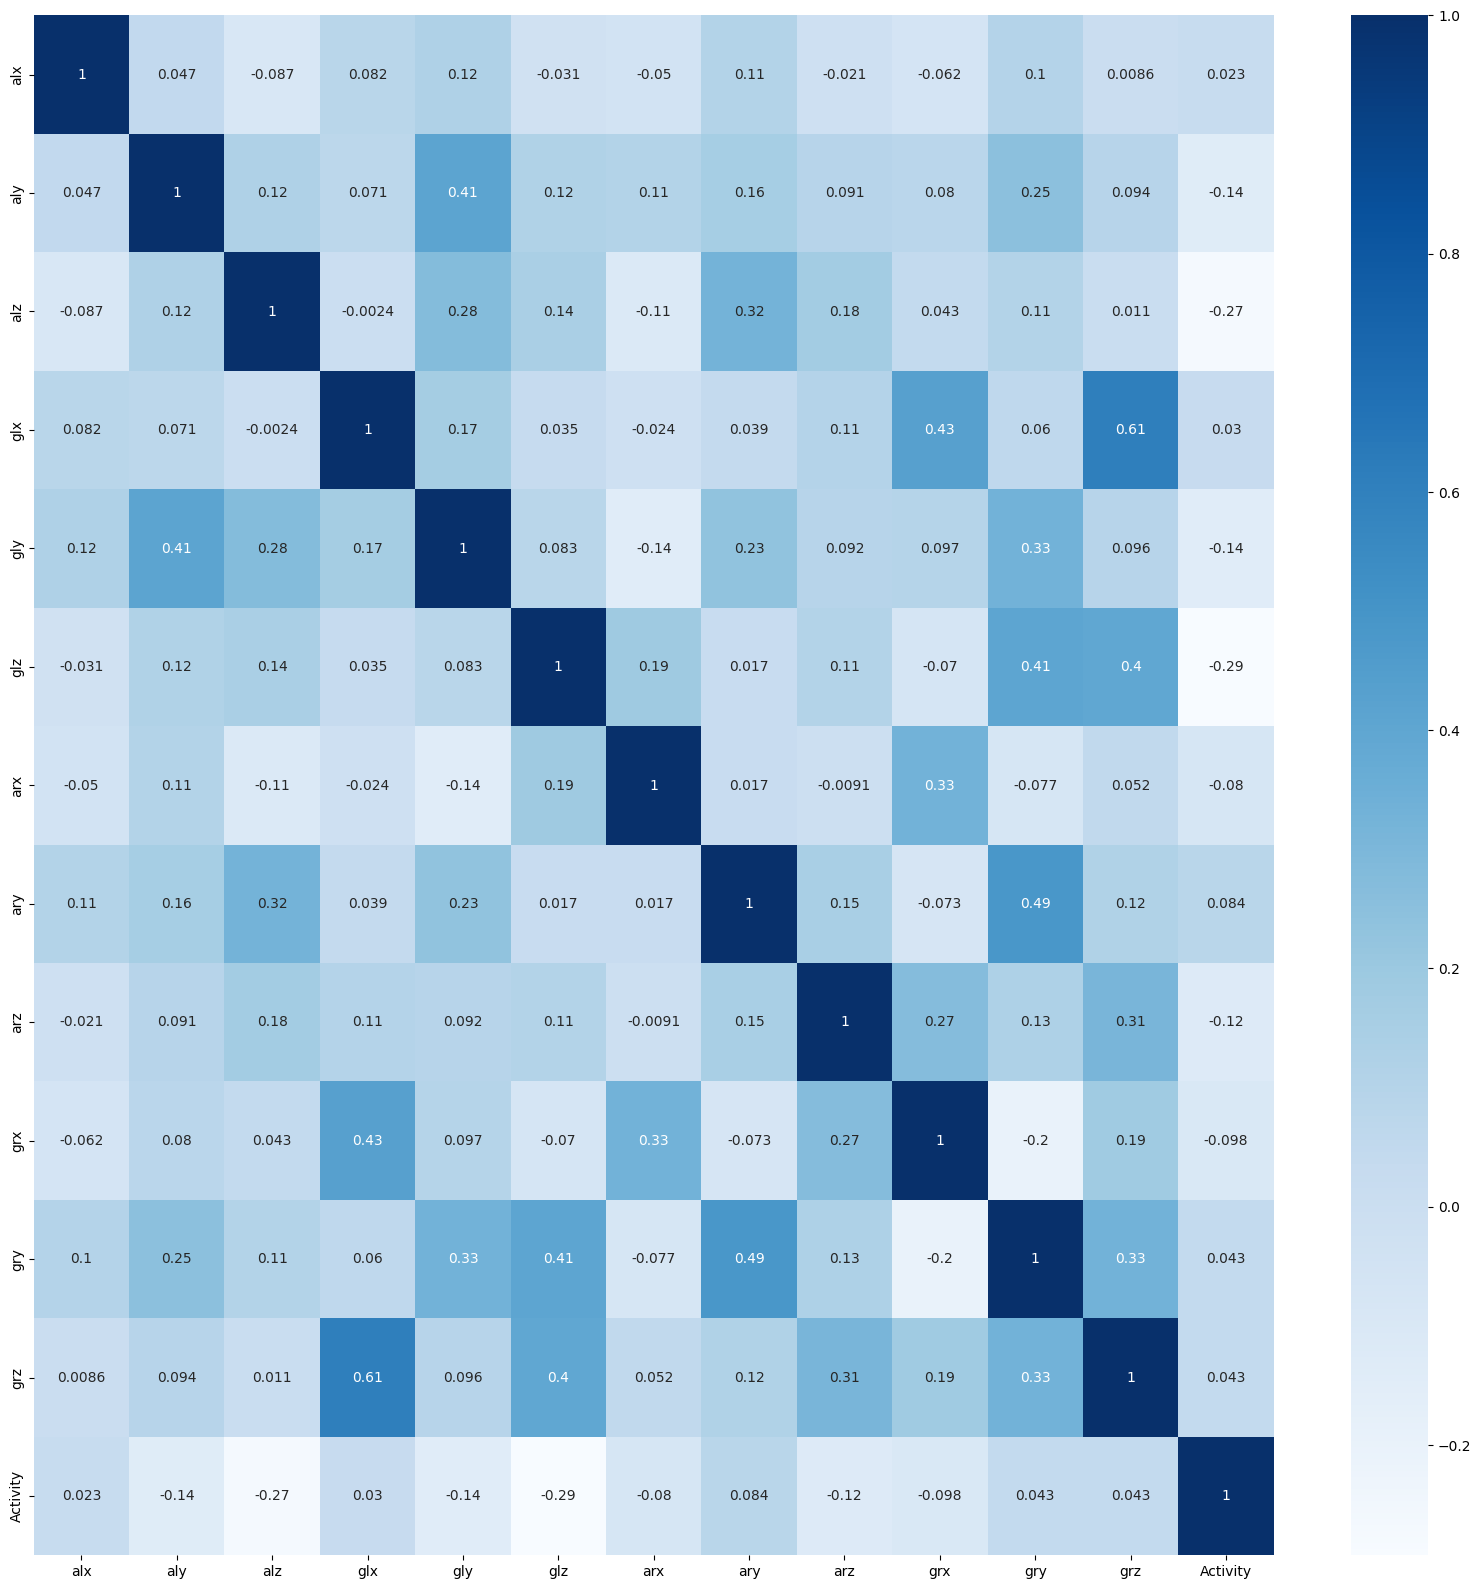

In [ ]:
# Set the color map to blue
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='Blues')


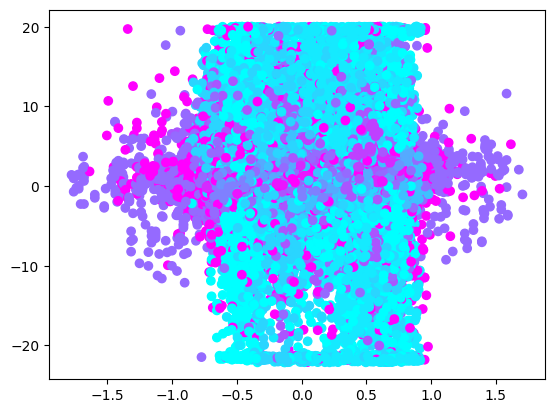

In [ ]:
plt.scatter(df['glx'], df['alx'], c = df['Activity'], cmap= 'cool_r')
# plt.title("glx vs alx")

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create and train the KNN model
n=3
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train, y_train)

# Make predictions
knn_pred = knn.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred, average='weighted')
knn_recall = recall_score(y_test, knn_pred, average='weighted')#average='weighted' parameter specifies that the precision scores for each
                                                            #class are weighted by the number of true instances for each class and then averaged.
knn_f1 = f1_score(y_test, knn_pred, average='weighted')
knn_confusion = confusion_matrix(y_test, knn_pred)

print(f"Accuracy: {knn_accuracy}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1-score: {knn_f1}")
print(f"Confusion Matrix:\n{knn_confusion}\n")
print(f"\nInsights for KNN")
print("- Feature Engineering: Ensure features are well-preprocessed and relevant.")
print("- Hyperparameters: Tune k and distance metrics for optimal performance.")
print("- Data Quality: Handle outliers and missing values.")
print("- Model Architecture: Understand KNN's instance-based learning nature.")
print("- Sample Size: Larger datasets can improve reliability.")
print("- Domain-Specific Insights: Consider spatial dependencies and problem context.")



Accuracy: 0.9490145035329118
Precision: 0.9489104543683746
Recall: 0.9490145035329118
F1-score: 0.9461166313882682
Confusion Matrix:
[[1245   43   27   24  157   86   67   91   83   89   30   31   60]
 [   0 2026    0    0    0    0    0    0    0    0    0    0    0]
 [   2    0 2026    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 2163    0    0    0    0    0    0    0    0    0]
 [   6    0    0    0 2044    3    1    0    1    0    0    0    0]
 [  21    0    0    0   29 1985    4    1   10    0    1    0    0]
 [   2    1    0    0    0    0 2018   12    5    0    0    0    0]
 [   2    0    0    0    0    0    6 2062    2    0    0    0    0]
 [  10    0    0    0    0    0    3    8 2055    0    0    0    0]
 [   2    0    0    0    0    0    0    0    2 2127    0    0    0]
 [   6    0    0    0    7    0    0    1    0    0 1946   73   18]
 [   9    0    0    0   12    0    0    1    0    0  124 1934   14]
 [  38    0    0    0   13    2    2    1    4    0

In [ ]:
# Interpretation of model predictions for KNN
print("\nExample predictions for KNN:")
for i in range(min(15, len(knn_pred))):
    pred_value = knn_pred[i]
    actual_value = y_test.iloc[i]  # Access the value using iloc instead of index
    print(f"Sample {i+1}: Predicted={pred_value}, Actual={actual_value}")


Example predictions for KNN:
Sample 1: Predicted=4, Actual=0
Sample 2: Predicted=5, Actual=5
Sample 3: Predicted=11, Actual=11
Sample 4: Predicted=7, Actual=7
Sample 5: Predicted=7, Actual=7
Sample 6: Predicted=7, Actual=7
Sample 7: Predicted=3, Actual=3
Sample 8: Predicted=11, Actual=11
Sample 9: Predicted=11, Actual=11
Sample 10: Predicted=9, Actual=9
Sample 11: Predicted=6, Actual=6
Sample 12: Predicted=1, Actual=1
Sample 13: Predicted=8, Actual=8
Sample 14: Predicted=5, Actual=5
Sample 15: Predicted=10, Actual=10


# **Linear Regression**

In [ ]:
# Train Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# predictions and Mean Squared Error
linear_regression_predictions = linear_regression.predict(X_test)
mse = mean_squared_error(y_test, linear_regression_predictions)
print("Mean Squared Error:", mse)

print(f"\nInsights for Linear Regression:")
print("- Feature Engineering: Select and transform features to meet linearity assumptions.")
print("- Hyperparameters: Tune regularization parameters for generalization.")
print("- Data Quality: Clean data from outliers and ensure linearity.")
print("- Model Architecture: Understand multicollinearity and simplicity of linear regression.")
print("- Sample Size: Larger samples can improve coefficient reliability.")
print("- Domain-Specific Insights: Leverage linear relationships within the domain.")


Mean Squared Error: 10.628779881082602

Insights for Linear Regression:
- Feature Engineering: Select and transform features to meet linearity assumptions.
- Hyperparameters: Tune regularization parameters for generalization.
- Data Quality: Clean data from outliers and ensure linearity.
- Model Architecture: Understand multicollinearity and simplicity of linear regression.
- Sample Size: Larger samples can improve coefficient reliability.
- Domain-Specific Insights: Leverage linear relationships within the domain.


In [ ]:
# Interpretation of model predictions for linear_regression_predictions
print("\nExample predictions for  Linear Regression:")
for i in range(min(15, len(linear_regression_predictions))):
    pred_value = linear_regression_predictions[i]
    actual_value = y_test.iloc[i]  # Access the value using iloc instead of index
    print(f"Sample {i+1}: Predicted={pred_value}, Actual={actual_value}")


Example predictions for  Linear Regression:
Sample 1: Predicted=6.034813297097192, Actual=0
Sample 2: Predicted=5.798163297636934, Actual=5
Sample 3: Predicted=8.256754703647083, Actual=11
Sample 4: Predicted=8.579715403607196, Actual=7
Sample 5: Predicted=5.334046328839746, Actual=7
Sample 6: Predicted=4.505369821127939, Actual=7
Sample 7: Predicted=4.764656941049887, Actual=3
Sample 8: Predicted=7.757189315972143, Actual=11
Sample 9: Predicted=9.68296890299489, Actual=11
Sample 10: Predicted=6.7501511199352855, Actual=9
Sample 11: Predicted=3.266051911783254, Actual=6
Sample 12: Predicted=4.0836000317932, Actual=1
Sample 13: Predicted=3.9467594913125916, Actual=8
Sample 14: Predicted=7.064238573908094, Actual=5
Sample 15: Predicted=10.170411598065519, Actual=10


#**SVM**

In [ ]:
svm = SVC(C=100,kernel='rbf')

# Train the SVM classifier
svm.fit(X_train, y_train)

# Make prdictions
svm_predictions = svm.predict(X_test)

# Calculate evaluation metrics
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions ,average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1_score = f1_score(y_test, svm_predictions, average='weighted')
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)

# Print evaluation metrics
print("Evaluation Metrics:")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1-score: {svm_f1_score}")
print("Confusion Matrix:")
print(svm_conf_matrix)

print(f"\nInsights for SVM : ")
print("- Feature Engineering: Preprocess and scale features, handle outliers.")
print("- Hyperparameters: Tune C, kernel type, and gamma for optimal performance.")
print("- Data Quality: SVMs are sensitive to outliers, handle them appropriately.")
print("- Model Architecture: Kernel choice and parameters impact decision boundary.")
print("- Sample Size: SVMs can handle different sample sizes.")
print("- Domain-Specific Insights: Understand problem characteristics for SVM configuration.")




Evaluation Metrics:
Accuracy: 0.9536630717738936
Precision: 0.9517617459665877
Recall: 0.9536630717738936
F1-score: 0.9516845766890515
Confusion Matrix:
[[1337   60   30   29  123   77   57   54   89   60   22   28   67]
 [   1 2025    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 2028    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 2163    0    0    0    0    0    0    0    0    0]
 [  37    0    0    0 2011    1    2    0    1    0    1    0    2]
 [  68    0    0    0   13 1958    1    0   10    0    0    0    1]
 [   6    2    0    0    0    0 2021    6    3    0    0    0    0]
 [   3    0    0    0    0    0   15 2053    1    0    0    0    0]
 [  17    1    0    0    1    7    6    9 2035    0    0    0    0]
 [   6    0    0    0    0    0    0    0    0 2125    0    0    0]
 [  17    0    0    0    0    0    0    1    0    0 1960   64    9]
 [  30    0    0    0    3    0    0    0    0    0   73 1971   17]
 [  57    0    0    0    2    0

In [ ]:
# Interpretation of model predictions for SVM
print("\nExample predictions for SVM:")
for i in range(min(15, len(svm_predictions))):
    pred_value = svm_predictions[i]
    actual_value = y_test.iloc[i]  # Access the value using iloc instead of index
    print(f"Sample {i+1}: Predicted={pred_value}, Actual={actual_value}")



Example predictions for SVM:
Sample 1: Predicted=4, Actual=0
Sample 2: Predicted=5, Actual=5
Sample 3: Predicted=11, Actual=11
Sample 4: Predicted=7, Actual=7
Sample 5: Predicted=7, Actual=7
Sample 6: Predicted=7, Actual=7
Sample 7: Predicted=3, Actual=3
Sample 8: Predicted=11, Actual=11
Sample 9: Predicted=11, Actual=11
Sample 10: Predicted=9, Actual=9
Sample 11: Predicted=6, Actual=6
Sample 12: Predicted=1, Actual=1
Sample 13: Predicted=8, Actual=8
Sample 14: Predicted=5, Actual=5
Sample 15: Predicted=10, Actual=10


# **Logistic Regression**

In [ ]:
logistic_regression = LogisticRegression()
# Train the classifier
logistic_regression.fit(X_train, y_train)

# Make predictions
logistic_regression_predictions = logistic_regression.predict(X_test)

# Calculate evaluation metrics
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
logistic_regression_precision = precision_score(y_test, logistic_regression_predictions, average='weighted')
logistic_regression_recall = recall_score(y_test, logistic_regression_predictions, average='weighted')
logistic_regression_f1 = f1_score(y_test, logistic_regression_predictions, average='weighted')
logistic_regression_conf_matrix = confusion_matrix(y_test, logistic_regression_predictions)

# Print evaluation metrics
print(f"Accuracy: {logistic_regression_accuracy}")
print(f"Precision: {logistic_regression_precision}")
print(f"Recall: {logistic_regression_recall}")
print(f"F1-score: {logistic_regression_f1}")
print(f"Confusion Matrix:\n{logistic_regression_conf_matrix}")

print(f"\nInsights for Logistic Regression: ")
print("- Feature Engineering: Select and preprocess features for binary classification.")
print("- Hyperparameters: Tune regularization parameters for classification.")
print("- Data Quality: Clean data, ensure linearity for logistic regression.")
print("- Model Architecture: Simple linear model with non-linear capabilities.")
print("- Sample Size: Larger samples improve stability and reliability.")
print("- Domain-Specific Insights: Understand binary classification and feature importance.")


Accuracy: 0.5564522127184827
Precision: 0.53177216118514
Recall: 0.5564522127184827
F1-score: 0.5378678339299112
Confusion Matrix:
[[  92  219  223   39  196   48  259  168  228  172  118  108  163]
 [   0 1399    0    0  204    0  409    0   14    0    0    0    0]
 [  36    0 1191    0    0  197    0  196    0  210    0    7  191]
 [   0    0    0 2163    0    0    0    0    0    0    0    0    0]
 [  41  217   14    1 1075  180  120    2  279    0    2   40   84]
 [ 190  136   83   14  376  622  152   37  279   30   12   33   87]
 [  99  403    2    0   40    1 1263    4  225    1    0    0    0]
 [  42  187  220   35   66    6  125 1208    3  135    0    5   40]
 [  55  117    1    0  149  151  368    5 1141    3   34   13   39]
 [   3    0    7    0    4    1    2   60  115 1939    0    0    0]
 [  29    0  109    4   26   29   12   19    8    1 1095  395  324]
 [  49    6  206    9   57  105   34   32   48    6  202 1212  128]
 [  80   33  173    8  111    9   89  138   55   23  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Interpretation of model predictions for Logistic Regression
print("\nExample predictions for Logistic Regression:")
for i in range(min(15, len(logistic_regression_predictions))):
    pred_value = logistic_regression_predictions[i]
    actual_value = y_test.iloc[i]
    print(f"Sample {i+1}: Predicted={pred_value}, Actual={actual_value}")


Example predictions for Logistic Regression:
Sample 1: Predicted=4, Actual=0
Sample 2: Predicted=6, Actual=5
Sample 3: Predicted=11, Actual=11
Sample 4: Predicted=7, Actual=7
Sample 5: Predicted=2, Actual=7
Sample 6: Predicted=7, Actual=7
Sample 7: Predicted=3, Actual=3
Sample 8: Predicted=11, Actual=11
Sample 9: Predicted=11, Actual=11
Sample 10: Predicted=9, Actual=9
Sample 11: Predicted=6, Actual=6
Sample 12: Predicted=1, Actual=1
Sample 13: Predicted=1, Actual=8
Sample 14: Predicted=4, Actual=5
Sample 15: Predicted=10, Actual=10


# **Neural Network**

In [ ]:
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

In [ ]:
# Data Preprocessing
# I will split the data again but into train , test and validation - after scaling them using the Min Max scaler:
min_max_scaler = preprocessing.MinMaxScaler() # to scale the input features (X) to a specific range (usually [0,1])
                                              #before feeding them into the neural network.
                                              # This step ensures that all features have a similar scale
X_scale = min_max_scaler.fit_transform(X)

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3, random_state=1)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state=1)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(94112, 12) (20167, 12) (20167, 12) (94112,) (20167,) (20167,)


In [ ]:
NN_model = Sequential([
    Dense(24, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(12, activation='relu'),
    Dense(13, activation='softmax'),
])
NN_model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist1 = NN_model.fit(X_train, Y_train,
          batch_size=32,
          epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
2941/2941 [==============================] - 8s 3ms/step - loss: 2.5402 - accuracy: 0.1151 - val_loss: 2.4935 - val_accuracy: 0.1806
Epoch 2/100
2941/2941 [==============================] - 5s 2ms/step - loss: 2.3691 - accuracy: 0.2102 - val_loss: 2.2426 - val_accuracy: 0.2293
Epoch 3/100
2941/2941 [==============================] - 7s 2ms/step - loss: 2.0920 - accuracy: 0.2783 - val_loss: 1.9519 - val_accuracy: 0.3366
Epoch 4/100
2941/2941 [==============================] - 6s 2ms/step - loss: 1.8358 - accuracy: 0.3734 - val_loss: 1.7606 - val_accuracy: 0.4009
Epoch 5/100
2941/2941 [==============================] - 6s 2ms/step - loss: 1.6857 - accuracy: 0.4255 - val_loss: 1.6361 - val_accuracy: 0.4438
Epoch 6/100
2941/2941 [==============================] - 8s 3ms/step - loss: 1.5822 - accuracy: 0.4556 - val_loss: 1.5389 - val_accuracy: 0.4727
Epoch 7/100
2941/2941 [==============================] - 6s 2ms/step - loss: 1.4912 - accuracy: 0.4818 - val_loss: 1.4586 - val_ac

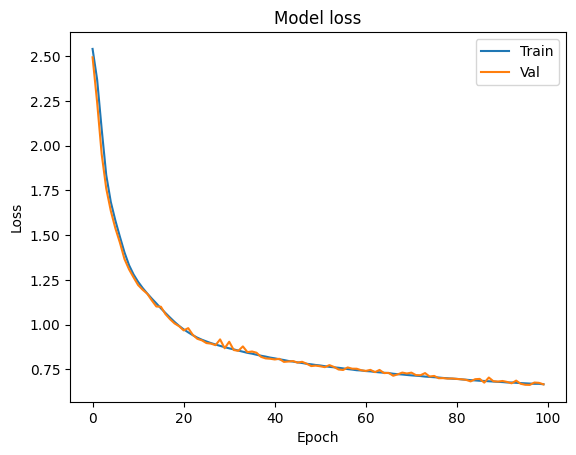

In [ ]:
# Visualizations
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

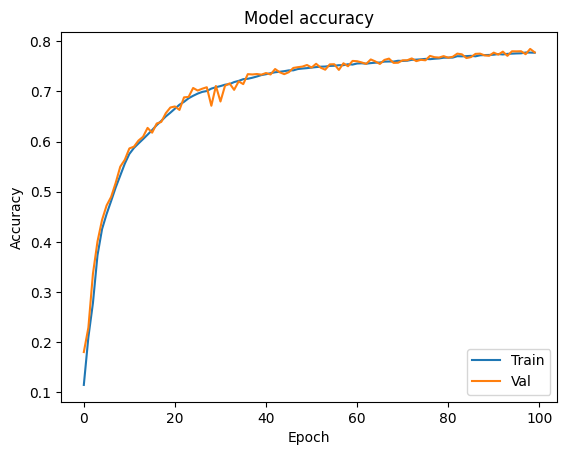

In [ ]:
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
nn_loss, nn_accuracy = NN_model.evaluate(X_test, Y_test)
print("NN Accuracy:", nn_accuracy)

631/631 [==============================] - 1s 1ms/step - loss: 0.6682 - accuracy: 0.7767
NN Accuracy: 0.7767144441604614


In [ ]:
#  second trial
NN_model2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax'),
])

NN_model2.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = NN_model2.fit(X_train, Y_train,
          batch_size=32,
          epochs=200,
          validation_data=(X_val, Y_val))


Epoch 1/200
2941/2941 [==============================] - 8s 3ms/step - loss: 2.4574 - accuracy: 0.2243 - val_loss: 2.2770 - val_accuracy: 0.2874
Epoch 2/200
2941/2941 [==============================] - 6s 2ms/step - loss: 1.9896 - accuracy: 0.3777 - val_loss: 1.7511 - val_accuracy: 0.4467
Epoch 3/200
2941/2941 [==============================] - 8s 3ms/step - loss: 1.5845 - accuracy: 0.4898 - val_loss: 1.4666 - val_accuracy: 0.5162
Epoch 4/200
2941/2941 [==============================] - 6s 2ms/step - loss: 1.3779 - accuracy: 0.5403 - val_loss: 1.3099 - val_accuracy: 0.5673
Epoch 5/200
2941/2941 [==============================] - 6s 2ms/step - loss: 1.2530 - accuracy: 0.5733 - val_loss: 1.2090 - val_accuracy: 0.5764
Epoch 6/200
2941/2941 [==============================] - 7s 2ms/step - loss: 1.1667 - accuracy: 0.5987 - val_loss: 1.1461 - val_accuracy: 0.6037
Epoch 7/200
2941/2941 [==============================] - 5s 2ms/step - loss: 1.1017 - accuracy: 0.6196 - val_loss: 1.0787 - val_ac

In [ ]:
nn_predictions = NN_model2.predict(X_test)

631/631 [==============================] - 1s 2ms/step


In [ ]:
nn_loss, nn_accuracy = NN_model2.evaluate(X_test, Y_test)
print("NN Accuracy:", nn_accuracy)

631/631 [==============================] - 1s 2ms/step - loss: 0.2623 - accuracy: 0.9191
NN Accuracy: 0.9190757274627686


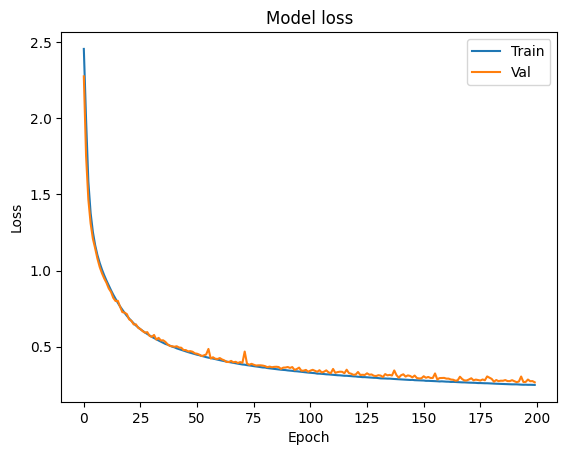

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


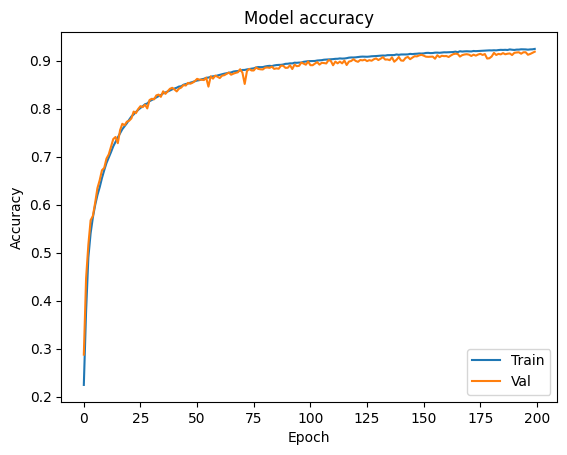

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
# Print evaluation metrics
y_pred = np.argmax(nn_predictions, axis=1) # argmax function -> to obtain the predicted class labels from the nn_predictions array along axis 1
nn_precision = precision_score(Y_test, y_pred, average='weighted')
nn_recall = recall_score(Y_test, y_pred, average='weighted')#average='weighted' parameter specifies that the precision scores for each
                                                            #class are weighted by the number of true instances for each class and then averaged.
nn_f1_score = f1_score(Y_test, y_pred, average='weighted')
nn_conf_matrix = confusion_matrix(Y_test, y_pred)
print("Evaluation Metrics for Neural Network:")
print(f"Accuracy: {nn_accuracy}")
print(f"Precision: {nn_precision}")
print(f"Recall: {nn_recall}")
print(f"F1-score: {nn_f1_score}")
print("Confusion Matrix:")
print(nn_conf_matrix)

print(f"\nInsights for Neural Network :")
print("- Feature Engineering: Preprocess and normalize features for convergence.")
print("- Hyperparameters: Tune architecture, learning rate, and regularization.")
print("- Data Quality: NNs can handle noisy data but benefit from clean data.")
print("- Model Architecture: Complexity can lead to overfitting, validate and regularize.")
print("- Sample Size: NNs benefit from large datasets for learning complex patterns.")
print("- Domain-Specific Insights: Design architecture based on problem complexity.")

Evaluation Metrics for Neural Network:
Accuracy: 0.9190757274627686
Precision: 0.9162731556183851
Recall: 0.9190757177567312
F1-score: 0.9142137059006374
Confusion Matrix:
[[ 769   52   27   24  141  162   68   54  107   56   30   32   42]
 [   0 1564    0    0    0    0    1    0    0    0    0    0    0]
 [   0    0 1569    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 1520    0    0    0    0    0    0    0    0    0]
 [  15    2    0    0 1597   24    5    0    2    0    0    6    2]
 [  51    1    0    0   73 1406    6    3   25    2    0    3    2]
 [  10   10    0    0    0    8 1436   10   12    0    0    0    0]
 [  14   11    0    0    0    4   39 1493   19    0    0    0    0]
 [  13    7    0    0    4   21   15    1 1495    1    0    0    5]
 [   8    0    0    0    0    4    0    0    2 1458    0    2    0]
 [  20    0    0    0    0    3    0    0    0    0 1402   88   21]
 [  13    0    1    0    4    2    0    0    0    0   58 1425    9]
 [  45    0 

# **Results Analysis**


In [ ]:
# KNN
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)

# SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

# NN
nn_loss, nn_accuracy = NN_model2.evaluate(X_test, Y_test)
print("Neural Network Accuracy:", nn_accuracy)
# Log
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
print("Logistic Regression:" ,logistic_regression_accuracy )


KNN Accuracy: 0.9490145035329118
SVM Accuracy: 0.9536630717738936
631/631 [==============================] - 1s 2ms/step - loss: 0.2623 - accuracy: 0.9191
Neural Network Accuracy: 0.9190757274627686
Logistic Regression: 0.5564522127184827


In [ ]:
accuracies = []

svm_accuracy = accuracy_score(y_test, svm_predictions)
accuracies.append(svm_accuracy)

knn_accuracy = accuracy_score(y_test, knn_pred)
accuracies.append(knn_accuracy)

nn_loss, nn_accuracy = NN_model2.evaluate(X_test, Y_test)
accuracies.append(nn_accuracy)

logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
accuracies.append(logistic_regression_accuracy)

print("List of Accuracies:", accuracies)


631/631 [==============================] - 1s 1ms/step - loss: 0.2623 - accuracy: 0.9191
List of Accuracies: [0.9536630717738936, 0.9490145035329118, 0.9190757274627686, 0.5564522127184827]


# **Conclusion**

In [ ]:
def generate_summary(accuracies):
    best_accuracy = 0.0
    best_model = None

    for index, accuracy in enumerate(accuracies):
        model_name = f"Model_{index + 1}"

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model_name


    summary = f"""
    Summary of the Best Model for Activity Recognition (MHEALTH Dataset):
    - The best-performing model based on accuracy was found to be {best_model} with an accuracy of {best_accuracy:.4f}.
    - Key factors contributing to the model's success include its ability to learn complex patterns, adapt to non-linear relationships, and handle high-dimensional data.
    - Feature engineering, hyperparameter tuning, and data preprocessing played crucial roles in optimizing the model's performance.
    """

    if best_model is not None:
        summary += f"\nBest-performing model: {best_model} (Accuracy: {best_accuracy:.4f})"
    else:
        summary += "\nNo models with accuracy information found."

    return summary


In [ ]:
summary = generate_summary(accuracies)
print(summary)


    Summary of the Best Model for Activity Recognition (MHEALTH Dataset):
    - The best-performing model based on accuracy was found to be Model_1 with an accuracy of 0.9537.
    - Key factors contributing to the model's success include its ability to learn complex patterns, adapt to non-linear relationships, and handle high-dimensional data.
    - Feature engineering, hyperparameter tuning, and data preprocessing played crucial roles in optimizing the model's performance.
    
Best-performing model: Model_1 (Accuracy: 0.9537)
